<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
plt.ion()

Populating the interactive namespace from numpy and matplotlib


## exercice

calculer l'image de la convergence de mandelbrot:

![](pics/mandelbrot.png)

* dans l'espace complexe où
   * $re \in [-2, 0.8]$
   * $im \in [-1.4, 1.4]$
* on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* découper ce pavé 
  * en un maillage de $w$ x $h$ points
* pour chacun, calculer si la suite diverge
  * avant un nombre d'itérations fixe
* afficher l'image obtenue avec `plt.imshow`

* une adaptation libre de l'[implementation proposée dans le tutorial scipy](https://docs.scipy.org/doc/numpy/user/quickstart.html#indexing-with-boolean-arrays)
* surtout pour remplacer `ogrid` 
* par une combinaison de `linspace` et `ix_`

In [6]:
# it's a little confusing that 
# real part = column = second dimension
# imag part = line =   first  dimension

def mandlebrot(h, w, maxit=20):
    re = np.linspace( -2.0, 0.8, w)
    im = np.linspace( -1.4, 1.4, h)
    # that's where it plays out
    y, x = np.ix_(im, re)
    # 
    c = x + 1j * y
    # initialize z 
    z = c
    # will contain the iteration where a divergence was found
    diverge_iteration = maxit + np.zeros( c.shape, dtype=int)

    for iteration in range(maxit):
        # create a new z array - c is left intact
        z = z * z + c
        # the complexes that diverged before this iteration
        bool_diverge = z * np.conj(z) > 4
        # the ones that diverged exactly at this iteration
        bool_diverge_now = bool_diverge & (diverge_iteration == maxit)
        # mark these
        diverge_iteration[bool_diverge_now] = iteration
        # avoid diverging too much ?
        z[bool_diverge] = 2

    return diverge_iteration

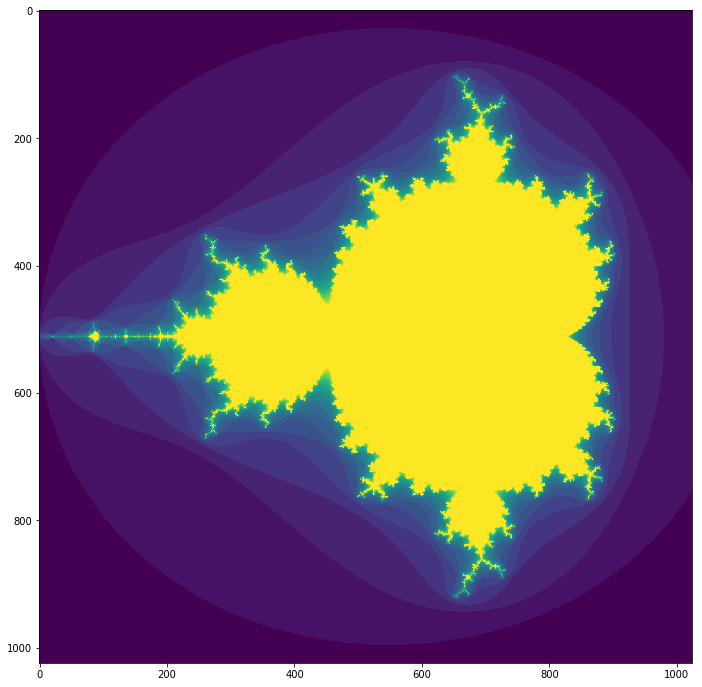

In [8]:
plt.figure(figsize=(12, 12))
plt.imshow(mandlebrot(1024, 1024));